# HotDog: Calories and Sodium

## Description

Results of a laboratory analysis of calories and sodium content of major hot dog brands. 
Researchers for Consumer Reports analyzed three types of hot dog: beef, poultry, and meat 
(mostly pork and beef, but up to 15% poultry meat).

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy.stats import linregress 


In [60]:

url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_012708_ID_Data_HotDogs'

df = pd.read_html(url)[1]

df = df.reindex(df.index.drop(0))
df[[1,2]] = df[[1,2]].astype(float)
df[0] = df[0].astype(str)
df.columns = ['type','calories','sodium']
# saved to csv 
df.to_csv("C:\\Users\\Nehe\\Documents\\hotdog.csv")

df.groupby('type')

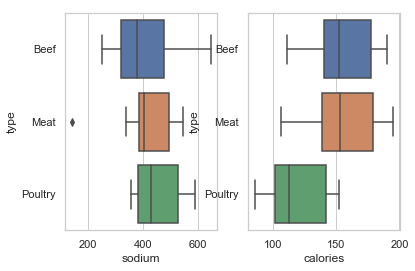

In [61]:

# violin plots 
fig, ax = plt.subplots(1,2)
sns.set(style="whitegrid")

sns.boxplot(data=df,x='sodium',y='type', ax =ax[0])
sns.boxplot(data=df,x='calories',y='type', ax=ax[1])
plt.show()


C:\Users\Nehe\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


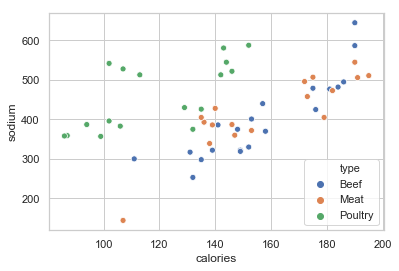

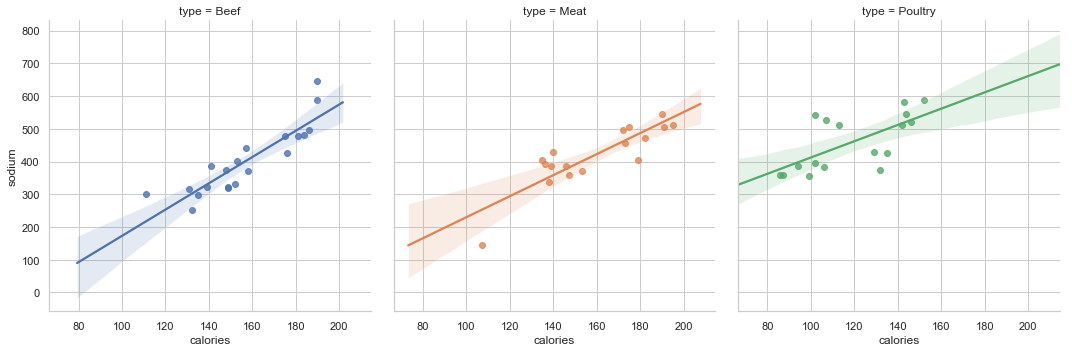

In [79]:
sns.scatterplot(data=df,x='calories',y='sodium', hue='type')
sns.lmplot(data=df,x='calories',y='sodium',col='type',hue='type')
plt.show()
# TODO - Neaten 4 graph output, add titles (matplot 4 axes)

### TODO -

* Comment on the relationship between sodium and calories
* implement linear regression test 


In [80]:
beef,meat,poultry = df.loc[0:20], df.loc[21:37], df.loc[37:]

In [90]:
# Method: sklearn.linear_model.LinearRegression( )
#This is the quintessential method used by majority of machine learning engineers and data scientists
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)


TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [84]:
 # Method: Stats.linregress( )
(a_s,b_s,r,tt,stderr) = linregress(poultry['calories'],poultry['sodium']) 

print('Linear regression using stats.linregress')
print('a=%.2f, b=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (a_s,b_s,stderr,r))


TypeError: 'tuple' object is not callable

In [66]:
# Method: Statsmodels.OLS ( )

X = sm.add_constant(beef['sodium'])
model = sm.OLS(beef['calories'], X)
results = model.fit()
#ar=results.params[1]
#br=results.params[0]

print('Linear regression using statsmodels.OLS \n')
print(results.summary())
#print('parameters: a=%.2f b=%.2f'% (ar,br))

Linear regression using statsmodels.OLS 

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     66.48
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           1.87e-07
Time:                        09:50:36   Log-Likelihood:                -74.801
No. Observations:                  20   AIC:                             153.6
Df Residuals:                      18   BIC:                             155.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

#### TODO
present the linear regression data above in a table